In [2]:
import pyaudio
import numpy as np

CHUNK = 2**11
RATE = 44100

p=pyaudio.PyAudio()
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK)

for i in range(int(10*44100/1024)): #go for a few seconds
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    peak=np.average(np.abs(data))*2
    bars="#"*int(50*peak/2**16)
    print("%04d %05d %s"%(i,peak,bars))

stream.stop_stream()
stream.close()
p.terminate()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


0000 00142 
0001 00231 
0002 00434 
0003 00106 
0004 00031 
0005 00059 
0006 00028 
0007 00018 
0008 00025 
0009 00015 
0010 00013 
0011 00016 
0012 00014 
0013 00014 
0014 00012 
0015 00015 
0016 00014 
0017 00013 
0018 00012 
0019 00011 
0020 00016 
0021 00015 
0022 00016 
0023 00016 
0024 00016 
0025 00058 
0026 00133 
0027 00058 
0028 00025 
0029 00020 
0030 00017 
0031 00022 
0032 00017 
0033 00013 
0034 00011 
0035 00021 
0036 00153 
0037 00126 
0038 00031 
0039 00024 
0040 00018 
0041 00017 
0042 00015 
0043 00014 
0044 00013 
0045 00010 
0046 00009 
0047 00012 
0048 00024 
0049 00142 
0050 00501 
0051 00536 
0052 00453 
0053 00328 
0054 00123 
0055 00495 
0056 00159 
0057 00038 
0058 00125 
0059 00106 
0060 00030 
0061 00021 
0062 00018 
0063 00019 
0064 00018 
0065 00017 
0066 00015 
0067 00013 
0068 00011 
0069 00011 
0070 00011 
0071 00047 
0072 00118 
0073 01297 
0074 02268 #
0075 02631 ##
0076 02467 #
0077 02162 #
0078 02073 #
0079 00701 
0080 01293 
0081 01097 
0082 00880

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[-298 -345   36 ... -270 -258 -116]


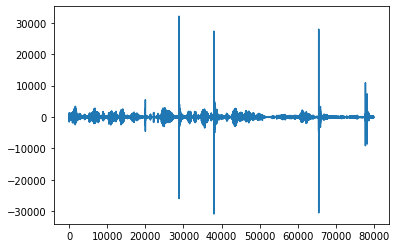

In [16]:
import pyaudio
import numpy
import matplotlib.pyplot as plt

RATE = 8000
RECORD_SECONDS = 10
CHUNKSIZE = 1024

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=RATE,
                input=True, frames_per_buffer=CHUNKSIZE)

frames = []  # A python-list of chunks(numpy.ndarray)
for _ in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
    data = stream.read(CHUNKSIZE)
    frames.append(numpy.fromstring(data, dtype=numpy.int16))

#Convert the list of numpy-arrays into a 1D array (column-wise)
numpydata = numpy.hstack(frames)

print(numpydata)
plt.plot(numpy.arange(0, len(numpydata)), numpydata)
plt.show()


# close stream
stream.stop_stream()
stream.close()
p.terminate()

In [8]:
import pyaudio
import numpy
import struct
import matplotlib.pyplot as plt
  
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 8000
CHUNK = 1024
RECORD_SECONDS = 5

audio = pyaudio.PyAudio()

# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)

print ("recording...")

frames = []
result_arr = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(numpy.frombuffer(data))
    data_int = numpy.array(struct.unpack(str(2*CHUNK) + 'B', data))[::2]
    result_arr.append(data_int)
# numpydata = numpy.hstack(frames)

plt.plot(numpy.arange(0,len(data_int)),data_int)

#     print(len(numpydata))
print ("finished recording")
# numpydata = numpy.hstack(frames)
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()

recording...
finished recording
